In [15]:
import os
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import time

In [30]:
from matplotlib import pyplot as plt

def do_PCA_and_save(activations_dir, save_dir, n_components=100, random_state=42):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    activations_file_list = glob.glob(os.path.join(activations_dir, '*.npy'))
    activations_file_list.sort()

    # Select the first 1000 files
    activations_file_list = activations_file_list[:1000]

    # Load data from each selected .npy file
    data_list = [np.load(file) for file in activations_file_list]

    # Stack all data into a single array
    x = np.vstack(data_list)

    # Split the data into training, testing, and validation sets
    x_train = x[:800, :]  # First 800 for training
    x_test = x[800:900, :]  # Next 100 for testing
    x_val = x[900:1000, :]  # Last 100 for validation

    # Standardize the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(x_train)

    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    x_val_pca = pca.transform(x_val)

    # Save the PCA-transformed data
    np.save(os.path.join(save_dir, "train_pca.npy"), x_train_pca)
    np.save(os.path.join(save_dir, "test_pca.npy"), x_test_pca)
    np.save(os.path.join(save_dir, "val_pca.npy"), x_val_pca)
    
    return pca.explained_variance_ratio_

In [31]:
# Usage:
activations_dir = r"C:/Users/andre/OneDrive/Documents/GitHub/Brainvision_Project/Motion_files/Layers-features/All/Layer_block_5"
save_dir = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\Layers-features\All\PCA_layer_block_5"

explained_variance_ratio = do_PCA_and_save(activations_dir, save_dir)

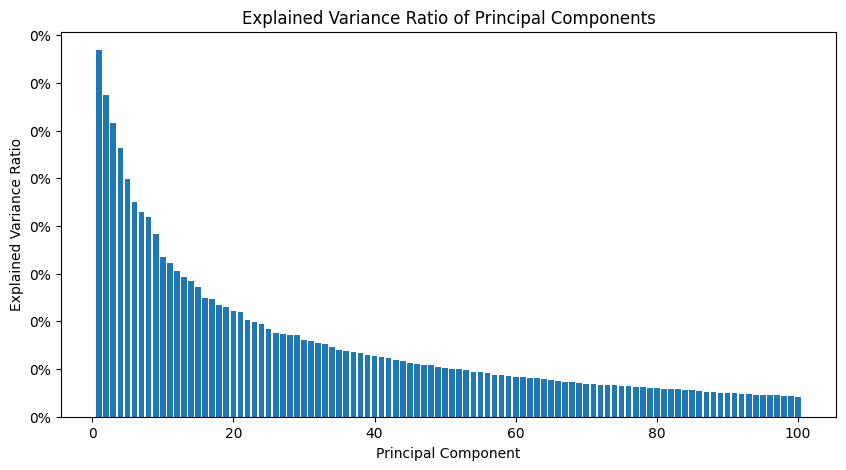

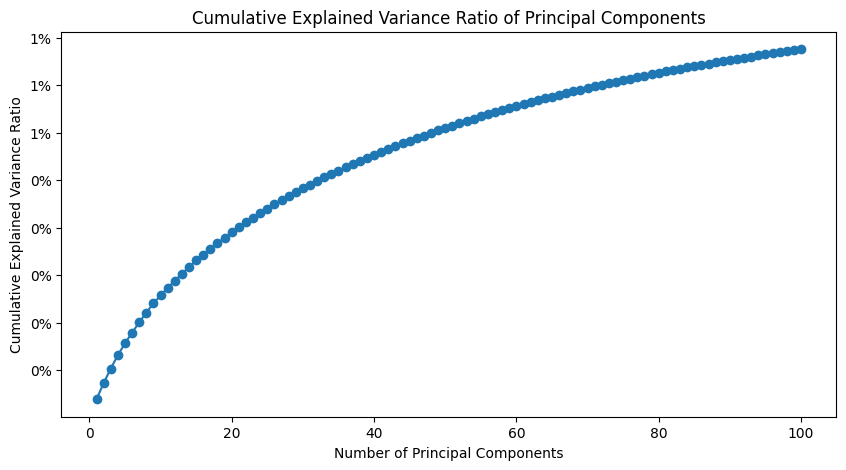

In [32]:
import matplotlib.ticker as mtick

# Assuming you have the explained_variance_ratio from the PCA
explained_variance_ratio = do_PCA_and_save(activations_dir, save_dir)

# Plot the explained variance ratio of individual components
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

# Format the y-axis as percentage
fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')

# Format the y-axis as percentage for the cumulative plot
plt.gca().yaxis.set_major_formatter(yticks)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.show()

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\Layers-features\All\0001_processed_layer_fast_pathway_2.npy"
data = np.load(file_path)

# Standardize the data
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)
data_standardized = (data - data_mean) / data_std

# Perform PCA
pca = PCA()
pca.fit(data_standardized)

# Determine the number of components that explain at least 70% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_70_percent = np.argmax(cumulative_variance >= 0.70) + 1  # +1 because indices start at 0

print(f"Number of components to retain 70% variance: {num_components_70_percent}")

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axvline(x=num_components_70_percent, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-0.01669087 -0.52292216 -0.3464744  ... -0.26807722  0.12286058
 -1.2413164 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
file_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\Layers-features\All\0001_processed_layer_fast_pathway_2.npy"
data = np.load(file_path)
data.shape

(65536,)